Description
Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

Explore the dataset and extract insights using Exploratory Data Analysis.
Do the users spend more time on the new landing page than the old landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

Data Dictionary:

user_id - This represents the user ID of the person visiting the website.
group - This represents whether the user belongs to the first group (control) or the second group (treatment).
landing_page - This represents whether the landing page is new or old.
time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
converted - This represents whether the user gets converted to a subscriber of the news portal or not.
language_preferred - This represents the language chosen by the user to view the landing page.

In [1]:
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [2]:
abtest=pd.read_csv('abtest.csv')
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [3]:
abtest.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [4]:
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
!pip install scipy==1.6.1

In [13]:
abtest.group.unique()

array(['control', 'treatment'], dtype=object)

In [14]:
abtest.landing_page.unique()

array(['old', 'new'], dtype=object)

In [15]:
abtest.groupby('group').count()

,user_id,landing_page,time_spent_on_the_page,converted,language_preferred
group,,,,,
control,50,50,50,50,50
treatment,50,50,50,50,50


In [90]:
pd.crosstab(abtest.group,abtest.landing_page)

landing_page,new,old
group,,
control,0,50
treatment,50,0


In [97]:
pd.crosstab(abtest.time_spent_on_the_page,abtest.landing_page)


landing_page,new,old
time_spent_on_the_page,,
0.19,0,1
0.22,0,1
0.40,0,2
0.91,0,1
0.93,0,1
...,...,...
9.15,0,1
9.49,1,0
10.30,0,1


In [98]:
b=pd.crosstab(abtest.time_spent_on_the_page,abtest.landing_page)

### Let's write the null and alternative hypothesis
Let  𝜇1, 𝜇2  be the mean the users spend time on the new landing page and the old landing page respectively.

We will test the null hypothesis

𝐻0: 𝜇1=𝜇2 
against the alternate hypothesis

𝐻𝑎: 𝜇1>𝜇2

Test at 0.05 level of significance whether the data provide sufficient evidence to conclude that the users spend more time on the new landing page than the old landing page

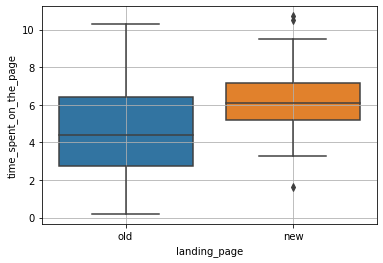

In [6]:
sns.boxplot(x="landing_page", y="time_spent_on_the_page", data = abtest)
plt.grid()
plt.show()

In [7]:
time_spent_on_the_page=abtest['time_spent_on_the_page']

In [8]:
landing_page_old=abtest[abtest['landing_page']=='old']['landing_page']
landing_page_new=abtest[abtest['landing_page']=='new']['landing_page']

In [9]:
print(abtest.groupby("landing_page")["time_spent_on_the_page"].mean())

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


In [10]:
print(abtest.groupby("landing_page")["time_spent_on_the_page"].std())

landing_page
new    1.817031
old    2.581975
Name: time_spent_on_the_page, dtype: float64


In [87]:
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(abtest.groupby("landing_page")["time_spent_on_the_page"].mean(), abtest['time_spent_on_the_page'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.5


In [100]:
test_stat, p_value = ttest_ind(b['new'], b['old'], equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.5


In [20]:
test_stat, p_value = ttest_1samp(abtest.time_spent_on_the_page, popmean = 5.377800, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.4999999999999985


In [25]:

test_stat,p_value = ttest_1samp(abtest.groupby("landing_page")["time_spent_on_the_page"].mean(), popmean = 5.377800, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.49999999999999967


As the p-value is much greater than the level of significance 0.05, we fail reject the null hypothesis. Thus, we do not have enough statistical evidence to say that the users spend more time on the new landing page than the old landing page. 

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


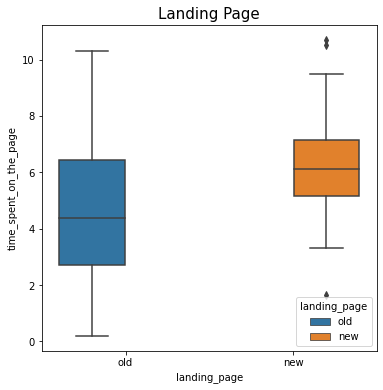

In [102]:
print(abtest.groupby("landing_page")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "landing_page", y = 'time_spent_on_the_page' , data = abtest, hue = 'landing_page')
a.set_title("Landing Page", fontsize=15)
plt.show()

### Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

'landing_page' and 'converted' are two categorical variables.

We want to see if the proportion of converted rate in the new landing page is significantly different from the proportion of converted rate in old landing page.

H0: The proportion of converted in the new landing page is equal to the proportion of converted in the old landing page.

Ha: The proportion of converted in the new landing page is not equal to the proportion of converted in the old landing page.

In [30]:
pd.crosstab(abtest.landing_page,abtest.converted)

converted,no,yes
landing_page,,
new,17,33
old,29,21


In [39]:
# number of female smokers
converted_new = abtest[abtest['landing_page']=='new'].converted.value_counts()['yes']
# number of male smokers
converted_old = abtest[abtest['landing_page']=='old'].converted.value_counts()['yes']

print('The numbers of new and old converted pages are {0} and {1} respectively'.format(converted_new, converted_old))

# number of females in the data
n_new = abtest.landing_page.value_counts()['new']

# number of males in the data
n_old = abtest.landing_page.value_counts()['old']

print('The total numbers of new and old are {0} and {1} respectively'.format(n_new, n_old))

The numbers of new and old converted pages are 33 and 21 respectively
The total numbers of new and old are 50 and 50 respectively


In [43]:
# find the p-value using proportion_ztest
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([converted_new, converted_old],[n_new, n_old] , alternative = 'two-sided')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.016052616408112556


Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the proportion of converted in the new landing page is not equal to the proportion of converted in the old landing page.



### Does the converted status depend on the preferred language?

Let's write the null and alternative hypothesis
We will test the null hypothesis

𝐻0:  Converted status is independent of preffered language.

against the alternate hypothesis

𝐻𝑎:  Converted status depends on preffered language.

Test at 0.05 level of significance whether the data provide sufficient evidence to conclude that the converted status depend on the preferred language

In [108]:
pd.crosstab(abtest.converted,abtest.language_preferred)

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [109]:
expected=pd.crosstab(abtest.converted,abtest.language_preferred)

In [110]:
abtest.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [111]:
abtest.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

In [112]:
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(expected)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


As the p-value is much more than the significance level, we cannot reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the converted status depend on the preferred language at 5% significance level.

### Is the mean time spent on the new page same for the different language users?

language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


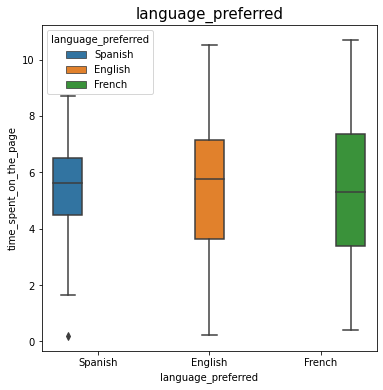

In [173]:
print(abtest.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = abtest, hue = 'language_preferred')
a.set_title("language_preferred", fontsize=15)
plt.show()

    user_id      group landing_page  time_spent_on_the_page converted  \
0    546592    control          old                    3.48        no   
2    546462  treatment          new                    4.40        no   
4    546459  treatment          new                    4.75       yes   
7    546581    control          old                    6.53       yes   
10   546588    control          old                    6.21       yes   
12   546491  treatment          new                    5.86       yes   
14   546578    control          old                    8.72       yes   
15   546466  treatment          new                    6.27       yes   
21   546584    control          old                    7.03       yes   
24   546456  treatment          new                    6.18        no   
27   546586    control          old                    4.05        no   
32   546585    control          old                    5.39       yes   
33   546577    control          old                

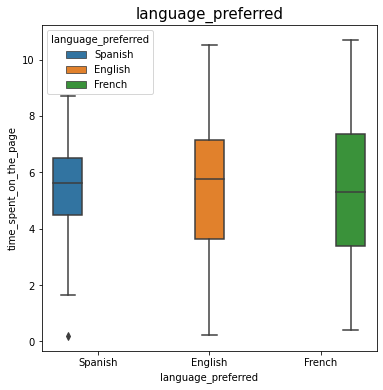

In [176]:
print(abtest[abtest['language_preferred'] == 'Spanish'], abtest[abtest['landing_page']=='new']['time_spent_on_the_page'],
                              abtest[abtest['language_preferred'] == 'English'], abtest[abtest['landing_page']=='new']['time_spent_on_the_page'],
                              abtest[abtest['language_preferred'] == 'French'], abtest[abtest['landing_page']=='new']['time_spent_on_the_page'])
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = abtest, hue = 'language_preferred')
a.set_title("language_preferred", fontsize=15)
plt.show()

In [124]:
pd.crosstab([abtest.landing_page,abtest.time_spent_on_the_page],abtest.language_preferred)

language_preferred                   English  French  Spanish
landing_page time_spent_on_the_page                          
new          1.65                          0       0        1
             3.30                          0       1        0
             3.65                          1       0        0
             3.68                          0       1        0
             3.88                          0       0        1
...                                      ...     ...      ...
old          8.46                          0       1        0
             8.50                          1       0        0
             8.72                          0       0        1
             9.15                          0       1        0
             10.30                         1       0        0

[96 rows x 3 columns]

In [175]:
print(last_question.mean())


0.34722222222222227


### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spend on the page for preferred language Spanish, English and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one avarage time spend is different from the rest.

In [126]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(abtest.loc[abtest['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              abtest.loc[abtest['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              abtest.loc[abtest['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


In [169]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(abtest[abtest['language_preferred'] == 'Spanish'], abtest[abtest['landing_page']=='new']['time_spent_on_the_page'],
                              abtest[abtest['language_preferred'] == 'English'], abtest[abtest['landing_page']=='new']['time_spent_on_the_page'],
                              abtest[abtest['language_preferred'] == 'French'], abtest[abtest['landing_page']=='new']['time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

ValueError: could not convert string to float: 'control'

In [172]:
abtest[abtest['language_preferred'] == 'Spanish'], abtest[abtest['landing_page']=='new']['time_spent_on_the_page']

(    user_id      group landing_page  time_spent_on_the_page converted  \
 0    546592    control          old                    3.48        no   
 2    546462  treatment          new                    4.40        no   
 4    546459  treatment          new                    4.75       yes   
 7    546581    control          old                    6.53       yes   
 10   546588    control          old                    6.21       yes   
 12   546491  treatment          new                    5.86       yes   
 14   546578    control          old                    8.72       yes   
 15   546466  treatment          new                    6.27       yes   
 21   546584    control          old                    7.03       yes   
 24   546456  treatment          new                    6.18        no   
 27   546586    control          old                    4.05        no   
 32   546585    control          old                    5.39       yes   
 33   546577    control          old  

In [150]:
abtest[abtest['landing_page']=='new']['time_spent_on_the_page'].mean()

6.2232

As the p-value is much more than the significance level, we cannot reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that at least one language spends different time from the rest at 5% significance level.